In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import datetime
import seaborn               as sns

In [2]:
USW = pd.read_csv('US Warehouse_total.csv',encoding='latin1')
AE = pd.read_csv('AE_keywords_search.csv',encoding='latin1')
AE_new = pd.read_csv('AE_keywords_search2.csv',encoding='latin1')
AE_re = pd.read_csv('AE_keywords_search3.csv',encoding='latin1')

In [3]:
AE2 = pd.concat([AE, AE_new],sort=True)
AE2 = pd.concat([AE2, AE_re],sort=True)

Checking Keywords count

In [4]:
len(AE2['keywords'].unique())

400

In [5]:
len(USW['keywords'].unique())

336

In [6]:
USW

,sku_id,sku_name,keywords,product_source,brands_auth,shopify_auth,sale_per,aftersales_per,cost_price,sales_price,...,customization,OEM,forpublishment,image,additional image,US_warehousefee,US_enddeliveryfee,gross_margin,freeshipping_price,total_price
0,601111240,Bike050-16,Bike,1P,True,True,0.00%,0.00%,94.99,139.99,...,False,True,True,https://img12.joybuy.com/eptjshop/jfs/t1/15317...,https://img12.joybuy.com/eptjshop/jfs/t1/13496...,1.5,8,0.15,122.41,112.62
1,601111244,Bike016pk-16,bike,1P,True,True,0.20%,0.00%,94.99,139.99,...,False,True,True,https://img12.joybuy.com/eptjshop/jfs/t1/12604...,https://img12.joybuy.com/eptjshop/jfs/t1/14050...,1.5,8,0.15,122.41,112.62
2,601111243,Bike016gr-16,Bike,1P,True,True,0.12%,0.00%,94.99,139.99,...,False,True,True,https://img12.joybuy.com/eptjshop/jfs/t1/15114...,https://img12.joybuy.com/eptjshop/jfs/t1/13260...,1.5,8,0.15,122.41,112.62
3,601111242,Bike016,bike,1P,True,True,0.10%,0.00%,94.99,139.99,...,False,True,True,https://img12.joybuy.com/eptjshop/jfs/t1/13900...,https://img12.joybuy.com/eptjshop/jfs/t1/14083...,1.5,8,0.15,122.41,112.62
4,601111245,Bike022bl-18,Bike,1P,True,True,0.01%,0.00%,102.99,149.99,...,False,True,True,https://img12.joybuy.com/eptjshop/jfs/t1/14239...,https://img12.joybuy.com/eptjshop/jfs/t1/12666...,1.5,8,0.15,131.90,122.10
5,601111241,Bike008-18,Bike,1P,True,True,0.01%,0.00%,99.99,149.99,...,False,True,True,https://img12.joybuy.com/eptjshop/jfs/t1/13170...,https://img12.joybuy.com/eptjshop/jfs/t1/12225...,1.5,8,0.15,128.34,118.54
6,600376269,Kimlee 60L Hiking Backpack Mountaineering Camp...,hiking bike,1P,True,True,0.01%,0.00%,23.99,61.99,...,False,True,True,https://img12.joybuy.com/eptjshop/jfs/t1/3897/...,https://img12.joybuy.com/eptjshop/jfs/t1/4185/...,1.5,8,0.15,38.24,28.44
7,600387570,Rexing Hardwire Kit for Rexing V1LG Dash Cameras,dash camera,1P,True,True,0.00%,0.00%,8.03,15.33,...,False,True,True,https://img12.joybuy.com/eptjshop/jfs/t1/4610/...,https://img12.joybuy.com/eptjshop/jfs/t1/3963/...,1.5,8,0.15,19.31,9.52
8,600386956,LENTION USB-C Hub CS64THCR,lention usb-c hub,1P,True,True,0.05%,0.00%,16.99,55.99,...,False,True,True,http://img10.360buyimg.com/img/jfs/t1/1049/3/2...,http://img10.360buyimg.com/img/jfs/t1/3252/40/...,1.5,8,0.15,29.94,20.14
9,600387105,LENTION USB-C Hub VGA100,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,6.49,8.99,...,False,True,True,http://img10.360buyimg.com/img/jfs/t1/4254/1/2...,http://img10.360buyimg.com/img/jfs/t1/2422/12/...,1.5,8,0.15,17.49,7.69


# Data Cleaning

In [7]:
def clean_price(price):
    if isinstance(price, float):
        return 0
    else:
        price = price.replace(',','')
        price_clean = float(price.split('$')[1])
        return price_clean

def float_price(price):
#     if isinstance(price, int):
#         return price
#     else:
    price = price.replace(',','')
    price_f = float(price)
    return price_f


# To unify some not-exact keywords, so that the values can be synchronized accordingly
def uni_keywords(keyword):
    if keyword =='Hard Case for Macbook':
        return 'Hard Case for MacBook'
    elif keyword =='Keyboard cover':
        return 'Keyboard Cover'
    elif keyword == 'Nylon Phone cover':
        return 'Nylon Phone Cover'
    elif keyword == 'macbook pouch':
        return 'MacBook Pouch'
    elif keyword == 'Portable Outdoor Chair':
        return 'portable outdoor chair'
    elif keyword == 'Folding Chair Cargo Cart':
        return 'portable outdoor chair'
    else:
        return keyword

def int_order(order):
    if isinstance(order, float):
        return 0
    else:
        order_int = int(order.split('sold')[0])
        return order_int

In [8]:
#convert price to float
AE2['price'] = AE2['price'].apply(clean_price)
#eliminate hook products
AEP = AE2[AE2['price'] >0.01]
AEP['sold'] = AEP['sold'].apply(int_order)
USW['keywords'] = USW['keywords'].apply(uni_keywords)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
len(AEP)

18290

### In the AE dataframe, create columns that indicates min, max, median and average price for each keyword

In [9]:
ali_dict = {keyword: [] for keyword in AEP['keywords'].unique()}
# ali_dict[keys] == AE['keywords'].unique()
print('Begin calculating prices!')
for key in AEP['keywords'].unique():
    avg_price = np.mean(AEP[AEP['keywords']==key]['price'])
#     print(avg_price)
    median_price = np.median(AEP[AEP['keywords'] == key]['price'])
#     print(median_price)
    min_price = np.min(AEP[AEP['keywords']==key]['price'])
    max_price = np.max(AEP[AEP['keywords']==key]['price'])
    order = np.mean(AEP[AEP['keywords']==key]['sold'])
    ali_dict[key].append(min_price)
    ali_dict[key].append(max_price)
    ali_dict[key].append(avg_price)
    ali_dict[key].append(median_price)
    ali_dict[key].append(order)

print('Finished calculating prices! start swifting values in df!')

AEP['AEP_min'] = 0  
AEP['AEP_max'] = 0 
AEP['AEP_avg'] = 0 
AEP['AEP_med'] = 0
AEP['order'] = 0
    
for key in AEP['keywords'].unique():
    AEP.loc[AEP.keywords == key, 'AEP_min'] = ali_dict[key][0]
    AEP.loc[AEP.keywords == key, 'AEP_max'] = ali_dict[key][1]
    AEP.loc[AEP.keywords == key, 'AEP_avg'] = ali_dict[key][2]
    AEP.loc[AEP.keywords == key, 'AEP_med'] = ali_dict[key][3]
    AEP.loc[AEP.keywords == key, 'order'] = ali_dict[key][4]
print('Finished!')

Begin calculating prices!
Finished calculating prices! start swifting values in df!


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib

Finished!


### In the USW dataset, do the fxxking same thing!

In [10]:
USW['AEP_min'] = 0  
USW['AEP_max'] = 0 
USW['AEP_avg'] = 0 
USW['AEP_med'] = 0 
USW['avg_order'] = 0
for key in AEP['keywords'].unique():
    if key in USW['keywords'].unique():
        USW.loc[USW.keywords == key, 'AEP_min'] = ali_dict[key][0]
        USW.loc[USW.keywords == key, 'AEP_max'] = ali_dict[key][1]
        USW.loc[USW.keywords == key, 'AEP_avg'] = ali_dict[key][2]
        USW.loc[USW.keywords == key, 'AEP_med'] = ali_dict[key][3]
        USW.loc[USW.keywords == key, 'avg_order'] = ali_dict[key][4]

In [11]:
USW['AEP min/total price'] = USW['AEP_min']/USW['total_price']
USW['AEP max/total price'] = USW['AEP_max']/USW['total_price']
USW['AEP avg/total price'] = USW['AEP_avg']/USW['total_price']
USW['AEP med/total price'] = USW['AEP_med']/USW['total_price']

In [12]:
USW

,sku_id,sku_name,keywords,product_source,brands_auth,shopify_auth,sale_per,aftersales_per,cost_price,sales_price,...,total_price,AEP_min,AEP_max,AEP_avg,AEP_med,avg_order,AEP min/total price,AEP max/total price,AEP avg/total price,AEP med/total price
0,601111240,Bike050-16,Bike,1P,True,True,0.00%,0.00%,94.99,139.99,...,112.62,2.08,8867.34,728.134167,315.275,29.900000,0.018469,78.736814,6.465407,2.799458
1,601111244,Bike016pk-16,bike,1P,True,True,0.20%,0.00%,94.99,139.99,...,112.62,9.89,9410.62,1392.116833,1225.060,37.216667,0.087817,83.560824,12.361187,10.877819
2,601111243,Bike016gr-16,Bike,1P,True,True,0.12%,0.00%,94.99,139.99,...,112.62,2.08,8867.34,728.134167,315.275,29.900000,0.018469,78.736814,6.465407,2.799458
3,601111242,Bike016,bike,1P,True,True,0.10%,0.00%,94.99,139.99,...,112.62,9.89,9410.62,1392.116833,1225.060,37.216667,0.087817,83.560824,12.361187,10.877819
4,601111245,Bike022bl-18,Bike,1P,True,True,0.01%,0.00%,102.99,149.99,...,122.10,2.08,8867.34,728.134167,315.275,29.900000,0.017035,72.623587,5.963425,2.582105
5,601111241,Bike008-18,Bike,1P,True,True,0.01%,0.00%,99.99,149.99,...,118.54,2.08,8867.34,728.134167,315.275,29.900000,0.017547,74.804623,6.142519,2.659651
6,600376269,Kimlee 60L Hiking Backpack Mountaineering Camp...,hiking bike,1P,True,True,0.01%,0.00%,23.99,61.99,...,28.44,2.08,8867.34,363.195333,175.695,14.466667,0.073136,311.791139,12.770581,6.177743
7,600387570,Rexing Hardwire Kit for Rexing V1LG Dash Cameras,dash camera,1P,True,True,0.00%,0.00%,8.03,15.33,...,9.52,2.35,259.99,68.342333,52.875,1060.600000,0.246849,27.309874,7.178817,5.554097
8,600386956,LENTION USB-C Hub CS64THCR,lention usb-c hub,1P,True,True,0.05%,0.00%,16.99,55.99,...,20.14,3.20,60.23,29.584000,25.940,25.300000,0.158888,2.990566,1.468918,1.287984
9,600387105,LENTION USB-C Hub VGA100,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,6.49,8.99,...,7.69,3.20,63.64,30.699500,31.545,26.800000,0.416125,8.275683,3.992133,4.102081


In [92]:
# for i in AEP['keywords'].unique():
#     if 'Nylon' in i:
#         print(1,i)
#     elif 'Folding' in i:
#         print(2,i)
#     elif 'chair' in i:
#         print(3,i)
#     elif 'Keyboard Cover' in i:
#         print(4,i)
#     elif 'Hard Case' in i:
#         print(5,i)
#     elif 'Pouch' in i:
#         print(6,i)
#     elif 'Cargo'in i:
#         print(7,i)

Checking the results of price comparison!

In [93]:
print('Number of products that JD USW has price advantage over AE price,if compare to min AE price:',len(USW[USW['AEP min/total price']>1]))
print('if compare to max AE price:',len(USW[USW['AEP max/total price']>1]))
print('if compare to average AE price:', len(USW[USW['AEP avg/total price']>1]))
print('if compare to median AE price:', len(USW[USW['AEP med/total price']>1]))

Number of products that JD USW has price advantage over AE price,if compare to min AE price: 22
if compare to max AE price: 591
if compare to average AE price: 243
if compare to median AE price: 178


In [14]:
USW.sort_values('AEP med/total price',ascending=False)

,sku_id,sku_name,keywords,product_source,brands_auth,shopify_auth,sale_per,aftersales_per,cost_price,sales_price,...,total_price,AEP_min,AEP_max,AEP_avg,AEP_med,avg_order,AEP min/total price,AEP max/total price,AEP avg/total price,AEP med/total price
3,601111242,Bike016,bike,1P,True,True,0.10%,0.00%,94.99,139.99,...,112.62,9.89,9410.62,1392.116833,1225.060,37.216667,0.087817,83.560824,12.361187,10.877819
1,601111244,Bike016pk-16,bike,1P,True,True,0.20%,0.00%,94.99,139.99,...,112.62,9.89,9410.62,1392.116833,1225.060,37.216667,0.087817,83.560824,12.361187,10.877819
6,600376269,Kimlee 60L Hiking Backpack Mountaineering Camp...,hiking bike,1P,True,True,0.01%,0.00%,23.99,61.99,...,28.44,2.08,8867.34,363.195333,175.695,14.466667,0.073136,311.791139,12.770581,6.177743
7,600387570,Rexing Hardwire Kit for Rexing V1LG Dash Cameras,dash camera,1P,True,True,0.00%,0.00%,8.03,15.33,...,9.52,2.35,259.99,68.342333,52.875,1060.600000,0.246849,27.309874,7.178817,5.554097
9,600387105,LENTION USB-C Hub VGA100,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,6.49,8.99,...,7.69,3.20,63.64,30.699500,31.545,26.800000,0.416125,8.275683,3.992133,4.102081
17,600386792,LENTION USB-C Dual Slot Card Reader,LENTION USB-C Card Reader,1P,True,True,0.01%,0.00%,6.62,8.99,...,7.85,9.30,80.16,33.100333,31.800,34.116667,1.184713,10.211465,4.216603,4.050955
18,600386973,LENTION USB-C Dual Slot Card Reader,LENTION USB-C Card Reader,1P,True,True,0.01%,0.00%,7.02,8.99,...,8.32,9.30,80.16,33.100333,31.800,34.116667,1.117788,9.634615,3.978405,3.822115
19,600979524,"Glarry UK101 21"" Basswood Ukulele Musical Hawa...",hawaiian guitar,1P,True,True,0.05%,0.00%,18.99,23.99,...,22.51,0.98,345.00,103.444333,79.555,91.266667,0.043536,15.326522,4.595483,3.534207
11,600387095,LENTION USB-C Hub PC320,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,7.99,13.99,...,9.47,3.20,63.64,30.699500,31.545,26.800000,0.337909,6.720169,3.241763,3.331045
10,600387094,LENTION USB-C Hub PC320,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,7.99,13.99,...,9.47,3.20,63.64,30.699500,31.545,26.800000,0.337909,6.720169,3.241763,3.331045


In [95]:
# USW.sort_values('AEP med/total price',ascending=False).to_csv('USW vs AE_with_647sku.csv')

In [18]:
US_total = pd.read_csv('USW vs AE_with_647sku.csv')

In [19]:
US_total

,Unnamed: 0,sku_id,sku_name,keywords,product_source,brands_auth,shopify_auth,sale_per,aftersales_per,cost_price,...,total_price,AEP_min,AEP_max,AEP_avg,AEP_med,avg_order,AEP min/total price,AEP max/total price,AEP avg/total price,AEP med/total price
0,3,601111242,Bike016,bike,1P,True,True,0.10%,0.00%,94.99,...,112.62,9.89,9410.62,1392.116833,1225.060,37.216667,0.087817,83.560824,12.361187,10.877819
1,1,601111244,Bike016pk-16,bike,1P,True,True,0.20%,0.00%,94.99,...,112.62,9.89,9410.62,1392.116833,1225.060,37.216667,0.087817,83.560824,12.361187,10.877819
2,6,600376269,Kimlee 60L Hiking Backpack Mountaineering Camp...,hiking bike,1P,True,True,0.01%,0.00%,23.99,...,28.44,2.08,8867.34,363.195333,175.695,14.466667,0.073136,311.791139,12.770581,6.177743
3,7,600387570,Rexing Hardwire Kit for Rexing V1LG Dash Cameras,dash camera,1P,True,True,0.00%,0.00%,8.03,...,9.52,2.35,259.99,68.342333,52.875,1060.600000,0.246849,27.309874,7.178817,5.554097
4,9,600387105,LENTION USB-C Hub VGA100,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,6.49,...,7.69,3.20,63.64,30.699500,31.545,26.800000,0.416125,8.275683,3.992133,4.102081
5,17,600386792,LENTION USB-C Dual Slot Card Reader,LENTION USB-C Card Reader,1P,True,True,0.01%,0.00%,6.62,...,7.85,9.30,80.16,33.100333,31.800,34.116667,1.184713,10.211465,4.216603,4.050955
6,18,600386973,LENTION USB-C Dual Slot Card Reader,LENTION USB-C Card Reader,1P,True,True,0.01%,0.00%,7.02,...,8.32,9.30,80.16,33.100333,31.800,34.116667,1.117788,9.634615,3.978405,3.822115
7,19,600979524,"Glarry UK101 21"" Basswood Ukulele Musical Hawa...",hawaiian guitar,1P,True,True,0.05%,0.00%,18.99,...,22.51,0.98,345.00,103.444333,79.555,91.266667,0.043536,15.326522,4.595483,3.534207
8,11,600387095,LENTION USB-C Hub PC320,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,7.99,...,9.47,3.20,63.64,30.699500,31.545,26.800000,0.337909,6.720169,3.241763,3.331045
9,10,600387094,LENTION USB-C Hub PC320,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,7.99,...,9.47,3.20,63.64,30.699500,31.545,26.800000,0.337909,6.720169,3.241763,3.331045


# Check USW products that has price advantages with WordCloud

In [20]:
word_lists = US_total[US_total['AEP med/total price']>1]['sku_name'].apply(lambda x: x.split(" "))

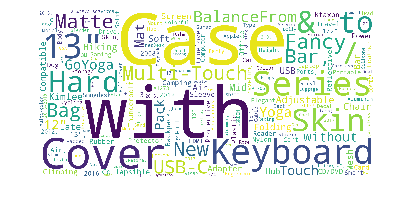

In [21]:
from nltk.corpus import stopwords
import string
extended_stop = ['Pro','MacBook','LENTION','For','for','And','0',"'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must',\
                   "n't", 'need', 'sha', 'wo', 'would','llc','inc','not','co','ltd','com','corp','m',\
                  '','be','ig','have','£','tweet','st','pm','let','\u2066\u2069','iam','w',\
                  'ma','t','v','eth','c','','b','d','bc']
stop = stopwords.words("english") + list(string.punctuation) + extended_stop

words_dict = dict()
for l in word_lists:
    for w in l:
        if w not in extended_stop:
            if words_dict.get(w):
                words_dict[w] += 1
            else:
                words_dict[w] = 1

results = sorted(words_dict.items(),key=lambda x: x[1],reverse=True) 

from wordcloud import WordCloud

wc_dict = words_dict.copy()
# wc_dropped = ["invest","financial","finance",'planning']
# for w in wc_dropped:
#     wc_dict.pop(w)
    
wc = WordCloud(background_color='white',width=2000,height=1000)
wc.generate_from_frequencies(wc_dict)
plt.imshow(wc)
plt.axis("off")
plt.show()

wc.to_file('USW.png')

In [20]:
US_total[US_total['AEP med/total price']>1]

,Unnamed: 0,sku_id,sku_name,keywords,product_source,brands_auth,shopify_auth,sale_per,aftersales_per,cost_price,...,freeshipping_price,total_price,AEP_min,AEP_max,AEP_avg,AEP_med,AEP min/total price,AEP max/total price,AEP avg/total price,AEP med/total price
0,3,601111242,Bike016,bike,1P,True,True,0.10%,0.00%,94.99,...,122.41,112.62,9.89,9410.62,1392.116833,1225.060,0.087817,83.560824,12.361187,10.877819
1,1,601111244,Bike016pk-16,bike,1P,True,True,0.20%,0.00%,94.99,...,122.41,112.62,9.89,9410.62,1392.116833,1225.060,0.087817,83.560824,12.361187,10.877819
2,6,600376269,Kimlee 60L Hiking Backpack Mountaineering Camp...,hiking bike,1P,True,True,0.01%,0.00%,23.99,...,38.24,28.44,2.08,8867.34,363.195333,175.695,0.073136,311.791139,12.770581,6.177743
3,7,600387570,Rexing Hardwire Kit for Rexing V1LG Dash Cameras,dash camera,1P,True,True,0.00%,0.00%,8.03,...,19.31,9.52,2.35,259.99,68.342333,52.875,0.246849,27.309874,7.178817,5.554097
4,9,600387105,LENTION USB-C Hub VGA100,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,6.49,...,17.49,7.69,3.20,63.64,30.699500,31.545,0.416125,8.275683,3.992133,4.102081
5,17,600386792,LENTION USB-C Dual Slot Card Reader,LENTION USB-C Card Reader,1P,True,True,0.01%,0.00%,6.62,...,17.64,7.85,9.30,80.16,33.100333,31.800,1.184713,10.211465,4.216603,4.050955
6,18,600386973,LENTION USB-C Dual Slot Card Reader,LENTION USB-C Card Reader,1P,True,True,0.01%,0.00%,7.02,...,18.12,8.32,9.30,80.16,33.100333,31.800,1.117788,9.634615,3.978405,3.822115
7,19,600979524,"Glarry UK101 21"" Basswood Ukulele Musical Hawa...",hawaiian guitar,1P,True,True,0.05%,0.00%,18.99,...,32.31,22.51,0.98,345.00,103.444333,79.555,0.043536,15.326522,4.595483,3.534207
8,11,600387095,LENTION USB-C Hub PC320,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,7.99,...,19.27,9.47,3.20,63.64,30.699500,31.545,0.337909,6.720169,3.241763,3.331045
9,10,600387094,LENTION USB-C Hub PC320,LENTION USB-C Hub,1P,True,True,0.00%,0.00%,7.99,...,19.27,9.47,3.20,63.64,30.699500,31.545,0.337909,6.720169,3.241763,3.331045
